# **Modul 8: Ekstraksi Ciri**

## **Mengimport Library yang dibutuhkan**

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

## **Membaca Path dan Mengimport Gambar Yang Akan Diolah dan Mengkonversi ke Grayscale**

>Kode tersebut digunakan untuk mengakses dan memuat citra-citra dalam format skala keabuan (grayscale) dari beberapa folder yang telah ditentukan. Melalui penggunaan library os dan cv, kode tersebut melakukan iterasi pada setiap folder dan file di dalamnya. Kemudian, setiap file citra dibaca menggunakan fungsi cv.imread(), diubah ke dalam skala keabuan menggunakan fungsi cv.cvtColor(), dan hasilnya disimpan dalam list data. Dengan demikian, kode ini membantu dalam mengumpulkan dan mempersiapkan data gambar untuk pengolahan atau analisis selanjutnya.

In [2]:
folders = [
    "fast-food/Baked Potato/", 
    "fast-food/Burger/", 
    "fast-food/Crispy Chicken/",
    "fast-food/Donut/",
    "fast-food/Fries/",
    "fast-food/Hot Dog/",
    "fast-food/Pizza/",
    "fast-food/Sandwich/",
    "fast-food/Taco/",
    "fast-food/Taquito/",
    ]
data = []
file_name=[]
for folder in folders:
    dataset = os.listdir(folder)
    for file in dataset:
        img_path = os.path.join(folder, file)
        name = os.path.splitext(file)[0]
        temp = cv.imread(img_path)
        gray_img = cv.cvtColor(temp, cv.COLOR_BGR2GRAY)
        data.append(gray_img)
        file_name.append(name)



In [3]:
# counter = 0  # Variabel untuk melacak jumlah gambar yang telah diakses

# for folder in folders:
#     dataset = os.listdir(folder)
#     for file in dataset:
#         if counter >= 25:
#             break  # Keluar dari perulangan jika telah mengakses 100 gambar
        
#         img_path = os.path.join(folder, file)
#         temp = cv.imread(img_path)
#         gray_img = cv.cvtColor(temp, cv.COLOR_BGR2GRAY)
#         data.append(gray_img)
        
#         counter += 1  # Tambahkan penghitung setiap kali mengakses sebuah gambar

In [4]:
dataset2=[]
for i in range(len(dataset)):
    dataset2.append(dataset[i])

## **Melakukan Normalisasi Pada Citra dan Meresize Citra**

>Pada kode tersebut, terdapat fungsi normalisasi yang digunakan untuk melakukan normalisasi pada citra dalam format skala keabuan. Fungsi ini mengiterasi setiap piksel dalam citra menggunakan perulangan for, kemudian menghitung nilai normalisasi dengan mengurangi nilai piksel dengan nilai minimum citra, dibagi dengan selisih nilai maksimum dan minimum, dan dikalikan dengan 255. Hasil normalisasi kemudian disimpan dalam variabel result yang merupakan citra hasil normalisasi.


In [5]:
def normalisasi(image):
    min_val = np.min(image)
    max_val = np.max(image)
    
    normalized_image = (image - min_val) / (max_val - min_val)
    uint8_image = (normalized_image * 255).astype(np.uint8)
    
    return uint8_image

>Selanjutnya, dilakukan proses normalisasi dan resizing pada setiap citra dalam list data menggunakan perulangan for dengan variabel i. Setiap citra di-normalisasi menggunakan fungsi normalisasi yang telah didefinisikan sebelumnya, kemudian hasil normalisasi di-resize menjadi ukuran 256x256 piksel menggunakan fungsi cv.resize. Citra hasil normalisasi dan resizing disimpan kembali dalam list data.

In [6]:
for i in range(len(data)):
    norm = normalisasi(data[i])
    res = cv.resize(norm, (256, 256), interpolation=cv.INTER_NEAREST)
    data[i] = res

## **Mengekspor Gambar Hasil Normalisasi dan Resize Menjadi File ke Dalam Folder Dataset**

>Pada kode berikut, savePath adalah path atau direktori tempat Anda ingin menyimpan gambar yang telah diproses. Dalam setiap iterasi dari loop for, variabel save dibuat dengan menggabungkan savePath, file_name[i] (nama file), dan ekstensi .jpg. Kemudian, fungsi cv.imwrite() digunakan untuk menyimpan citra yang ada dalam data[i] ke dalam path yang ditentukan oleh save. Dengan demikian, kode tersebut akan menyimpan setiap citra dalam data dengan nama file yang sesuai ke dalam direktori savePath dengan format .jpg.

In [7]:
savePath = "dataset/"
for i in range(len(data)):
    save = savePath + file_name[i] + ".jpg"
    cv.imwrite(save, data[i])

## **Mengekstraksi Citra dengan sudut 0,45,90 dan 90**

>Dalam blok kode tersebut, terdapat fungsi normdegree yang digunakan untuk melakukan normalisasi derajat pada citra dalam format skala keabuan. Fungsi ini pertama-tama menghitung jumlah piksel dalam citra dengan menggunakan fungsi np.sum dan menyimpannya dalam variabel sum. Selanjutnya, dilakukan iterasi pada setiap piksel dalam citra menggunakan perulangan for untuk mendapatkan nilai piksel yang telah dinormalisasi. Dalam perulangan tersebut, setiap piksel dalam citra di-normalisasi dengan membaginya dengan nilai sum. Hasil normalisasi kemudian disimpan dalam variabel result yang merupakan citra hasil normalisasi derajat. Fungsi normdegree ini memungkinkan untuk mendapatkan distribusi relatif piksel dalam citra, di mana setiap piksel diwakili oleh nilai yang mencerminkan kontribusinya terhadap keseluruhan citra.

In [8]:
def normdegree(image):
    sum = np.sum(image)
    result = np.zeros(image.shape)
    result = image/sum
    return result

>Fungsi is_index_valid digunakan untuk memeriksa apakah indeks (i, j) valid dalam array dua dimensi arr. Dengan memeriksa batasan array, yaitu apakah i dan j berada dalam rentang yang benar, fungsi ini mengembalikan True jika indeks valid, dan sebaliknya False. Fungsi ini berguna untuk mencegah kesalahan indeks saat mengakses elemen dalam array dua dimensi, memastikan bahwa operasi yang dilakukan berada dalam batas yang tepat dan tidak melampaui ukuran array yang ada.

In [9]:
def is_index_valid(arr, i, j):
    return 0 <= i < len(arr) and 0 <= j < len(arr[0])

>Fungsi derajat0 digunakan untuk menghitung matriks derajat kecocokan (co-occurrence matrix) pada suatu gambar dengan derajat sudut 0°. Fungsi ini mengambil gambar dan parameter bit yang menentukan ukuran matriks derajat kecocokan yang dihasilkan. Pertama, matriks derajat kecocokan diinisialisasi dengan nol sesuai ukuran yang ditentukan. Kemudian, dilakukan perulangan pada setiap piksel dalam gambar, dan jika indeks tetangga yang diperlukan valid, matriks derajat kecocokan diperbarui dengan menambahkan 1 pada elemen yang sesuai. Setelah itu, matriks derajat kecocokan disimetriskan dengan menjumlahkan matriks dengan transposenya, dan hasilnya dinormalisasi menggunakan fungsi normdegree. Akhirnya, matriks derajat kecocokan tersebut dikembalikan sebagai hasilnya.

In [10]:
def derajat0(image, bit):
    result = np.zeros((2**bit, 2**bit))
    result.shape
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if is_index_valid(image,i,j+1):
                result[image[i,j], image[i,j+1]] += 1
    result = result + result.T
    result = normdegree(result)
    return result

>Fungsi derajat90 digunakan untuk menghitung matriks derajat kecocokan (co-occurrence matrix) pada suatu gambar dengan derajat sudut 90°. Fungsi ini menerima gambar dan parameter bit yang menentukan ukuran matriks derajat kecocokan yang dihasilkan. Pertama, matriks derajat kecocokan diinisialisasi dengan nol sesuai dengan ukuran yang ditentukan. Selanjutnya, dilakukan perulangan pada setiap piksel dalam gambar, dan jika indeks tetangga yang diperlukan valid, matriks derajat kecocokan diperbarui dengan menambahkan 1 pada elemen yang sesuai. Setelah itu, matriks derajat kecocokan disimetriskan dengan menjumlahkan matriks dengan transposenya. Terakhir, hasilnya dinormalisasi menggunakan fungsi normdegree. Hasil matriks derajat kecocokan tersebut kemudian dikembalikan sebagai output dari fungsi.

In [11]:
def derajat90(image, bit):
    result = np.zeros((2**bit, 2**bit))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if is_index_valid(image,i-1,j):
                result[image[i,j], image[i-1,j]] += 1
    result = result + result.T
    result = normdegree(result)
    return result

>Fungsi derajat45 digunakan untuk menghitung matriks derajat kecocokan (co-occurrence matrix) pada suatu gambar dengan derajat sudut 45°. Fungsi ini menerima gambar dan parameter bit yang menentukan ukuran matriks derajat kecocokan yang dihasilkan. Pertama, matriks derajat kecocokan diinisialisasi dengan nol sesuai dengan ukuran yang ditentukan. Selanjutnya, dilakukan perulangan pada setiap piksel dalam gambar, dan jika indeks tetangga yang diperlukan valid, matriks derajat kecocokan diperbarui dengan menambahkan 1 pada elemen yang sesuai. Setelah itu, matriks derajat kecocokan disimetriskan dengan menjumlahkan matriks dengan transposenya. Terakhir, hasilnya dinormalisasi menggunakan fungsi normdegree. Hasil matriks derajat kecocokan tersebut kemudian dikembalikan sebagai output dari fungsi.

In [12]:
def derajat45(image, bit):
    result = np.zeros((2**bit, 2**bit))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if is_index_valid(image,i-1,j+1):
                result[image[i,j], image[i-1,j+1]] += 1
    result = result + result.T
    result = normdegree(result)
    return result

>Fungsi derajat135 digunakan untuk menghitung matriks derajat kecocokan (co-occurrence matrix) pada suatu gambar dengan derajat sudut 135°. Fungsi ini menerima gambar dan parameter bit yang menentukan ukuran matriks derajat kecocokan yang dihasilkan. Pertama, matriks derajat kecocokan diinisialisasi dengan nol sesuai dengan ukuran yang ditentukan. Selanjutnya, dilakukan perulangan pada setiap piksel dalam gambar, dan jika indeks tetangga yang diperlukan valid, matriks derajat kecocokan diperbarui dengan menambahkan 1 pada elemen yang sesuai. Setelah itu, matriks derajat kecocokan disimetriskan dengan menjumlahkan matriks dengan transposenya. Terakhir, hasilnya dinormalisasi menggunakan fungsi normdegree. Hasil matriks derajat kecocokan tersebut kemudian dikembalikan sebagai output dari fungsi.

In [13]:
def derajat135(image, bit):
    result = np.zeros((2**bit, 2**bit))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if is_index_valid(image,i-1,j-1):
                result[image[i,j], image[i-1,j-1]] += 1
    result = result + result.T
    result = normdegree(result)
    return result

>Pada blok kode di atas, terdapat empat perulangan yang masing-masing menghitung matriks derajat kecocokan pada setiap gambar dalam dataset. Pertama, terdapat perulangan untuk menghitung matriks derajat kecocokan dengan derajat 0° menggunakan fungsi derajat0. Hasilnya disimpan dalam daftar Degree0. Selanjutnya, terdapat perulangan yang serupa untuk menghitung matriks derajat kecocokan dengan derajat 45° menggunakan fungsi derajat45, dan hasilnya disimpan dalam daftar Degree45. Demikian pula, terdapat perulangan untuk derajat 90° dan 135°, dengan hasil masing-masing disimpan dalam daftar Degree90 dan Degree135. Dengan demikian, setelah perulangan selesai, keempat daftar tersebut akan berisi matriks derajat kecocokan dari setiap gambar dalam dataset sesuai dengan derajat sudut yang dihitung.

In [14]:
Degree0 = []
for i in range(len(data)):
    temp = derajat0(data[i], 8)
    Degree0.append(temp)
Degree45 = []
for i in range(len(data)):
    temp = derajat45(data[i], 8)
    Degree45.append(temp)
Degree90 = []
for i in range(len(data)):
    temp = derajat90(data[i], 8)
    Degree90.append(temp)
Degree135 = []
for i in range(len(data)):
    temp = derajat135(data[i], 8)
    Degree135.append(temp)


## **Mengekstrasi Citra hasil Co-ocurrency derajat Dengan Fitur yang diperintahkan lalu Mengekspor dalam Bentuk File CSV**

>Pada fungsi contrast, terdapat perulangan untuk mengiterasi setiap elemen dalam matriks input. Setiap elemen matriks dihitung dengan rumus (i-j)^2, di mana i dan j adalah posisi baris dan kolom elemen tersebut dalam matriks. Hasil perhitungan ini dikalikan dengan nilai elemen tersebut, kemudian ditambahkan ke dalam variabel result. Pada akhir perulangan, fungsi mengembalikan nilai result yang merupakan nilai kontras dari matriks. Dengan demikian, fungsi ini dapat digunakan untuk menghitung kontras suatu matriks.

In [15]:
def contrast(matriks):
    result = 0
    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            result+=((i-j)**2)*matriks[i,j]
    return result

>Fungsi dissimilarity digunakan untuk menghitung dissimilarity atau perbedaan antara elemen-elemen dalam matriks input. Pada setiap iterasi perulangan, perbedaan antara posisi baris dan kolom elemen dihitung dengan menggunakan fungsi abs(i-j), di mana i dan j adalah posisi elemen tersebut dalam matriks. Hasil perhitungan ini dikalikan dengan nilai elemen tersebut, kemudian diakumulasikan dalam variabel dis. Setelah seluruh elemen matriks diiterasi, fungsi mengembalikan nilai dis yang merupakan nilai dissimilarity dari matriks. Dengan demikian, fungsi ini dapat digunakan untuk mengukur tingkat perbedaan antara elemen-elemen dalam suatu matriks.

In [16]:
def dissimilarity(matriks):
    dis = 0
    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            dis += matriks[i,j]*abs(i-j)
    return dis

>Fungsi homogeneity digunakan untuk menghitung homogenitas atau keseragaman elemen-elemen dalam matriks input. Pada setiap iterasi perulangan, perbedaan absolut antara posisi baris dan kolom elemen dihitung dengan menggunakan fungsi abs(i-j), di mana i dan j adalah posisi elemen tersebut dalam matriks. Nilai ini kemudian digunakan sebagai penyebut dalam pembagian elemen matriks tersebut. Elemen matriks tersebut kemudian diakumulasikan dalam variabel hom. Setelah seluruh elemen matriks diiterasi, fungsi mengembalikan nilai hom yang merupakan nilai homogenitas dari matriks. Dengan demikian, fungsi ini dapat digunakan untuk mengukur tingkat keseragaman atau kehomogenan elemen-elemen dalam suatu matriks.

In [17]:
def homogenity(matriks):
    hom = 0
    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            hom += matriks[i,j]/(1+(abs(i-j)))
    return hom

>Fungsi entropy digunakan untuk menghitung entropi dari matriks input. Pada setiap iterasi perulangan, nilai elemen matriks dicek apakah tidak sama dengan nol. Jika tidak sama dengan nol, maka dilakukan perhitungan entropi dengan menggunakan rumus -p*log2(p), di mana p adalah nilai elemen matriks. Nilai entropi per elemen tersebut kemudian diakumulasikan dalam variabel ent. Setelah seluruh elemen matriks diiterasi, fungsi mengembalikan nilai ent yang merupakan nilai entropi dari matriks. Dengan demikian, fungsi ini dapat digunakan untuk mengukur tingkat keacakan atau ketidakpastian dalam distribusi nilai elemen-elemen dalam suatu matriks.

In [18]:
def entropy(matriks):
    ent = 0
    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            if matriks[i,j] != 0:
                ent -= matriks[i,j]*np.log2(matriks[i,j])
    return ent

>Fungsi ASM (Angular Second Moment) digunakan untuk menghitung nilai ASM dari matriks input. Nilai ASM dihitung dengan mengkuadratkan setiap elemen matriks, kemudian menjumlahkan seluruh elemen yang telah dikuadratkan. Hasil penjumlahan ini merupakan nilai ASM yang menggambarkan konsistensi atau homogenitas tekstur dalam matriks. Dengan kata lain, fungsi ini mengukur sejauh mana intensitas piksel dalam matriks seragam atau tidak berubah-ubah. Nilai ASM yang lebih tinggi menunjukkan tekstur yang lebih homogen dan seragam, sementara nilai yang lebih rendah menunjukkan adanya variasi intensitas yang lebih besar.

In [19]:
def ASM(matriks):
    asm = np.sum(matriks**2)
    return asm

>Fungsi energy digunakan untuk menghitung nilai energi dari matriks input. Nilai energi dihitung dengan mengakar kuadrat dari nilai ASM (Angular Second Moment) yang dihasilkan oleh matriks tersebut. Dengan demikian, fungsi ini menggambarkan sejauh mana intensitas piksel dalam matriks berkontribusi terhadap energi keseluruhan. Nilai energi yang tinggi menunjukkan adanya tekstur yang kuat atau kompleks dalam matriks, sedangkan nilai energi yang rendah menunjukkan adanya daerah yang lebih homogen atau seragam. Dalam konteks analisis tekstur, penggunaan fungsi energy sering kali lebih umum daripada menggunakan nilai ASM langsung, karena energi memberikan representasi yang lebih intuitif tentang tingkat keberagaman atau variasi tekstur dalam matriks.

In [20]:
def energy(matriks):
    return np.sqrt(ASM(matriks))

>Fungsi idxMiu digunakan untuk menghitung nilai rata-rata (mean) dalam arah sumbu I dan J dari matriks input. Dalam proses ini, setiap elemen matriks dikalikan dengan koordinat baris (i) atau kolom (j) yang sesuai, dan hasilnya dijumlahkan untuk setiap arah. Fungsi ini mengembalikan dua nilai, yaitu miuI (mean dalam arah sumbu I) dan miuJ (mean dalam arah sumbu J).

>Fungsi stdDev digunakan untuk menghitung standar deviasi dalam arah sumbu I dan J dari matriks input. Nilai rata-rata miuI dan miuJ yang dihitung menggunakan fungsi idxMiu digunakan dalam perhitungan ini. Setiap elemen matriks dikalikan dengan kuadrat selisih antara koordinat baris atau kolom dengan nilai rata-rata yang sesuai, kemudian hasilnya diakar kuadrat dan dijumlahkan untuk setiap arah. Fungsi ini mengembalikan dua nilai, yaitu stdDevI (standar deviasi dalam arah sumbu I) dan stdDevJ (standar deviasi dalam arah sumbu J).

>Fungsi correlation digunakan untuk menghitung koefisien korelasi antara arah sumbu I dan J dalam matriks input. Nilai rata-rata miuI dan miuJ serta standar deviasi stdDevI dan stdDevJ yang dihitung menggunakan fungsi idxMiu dan stdDev digunakan dalam perhitungan ini. Setiap elemen matriks dikalikan dengan selisih antara koordinat baris (i) dan miuI, selisih antara koordinat kolom (j) dan miuJ, serta faktor normalisasi dari stdDevI dan stdDevJ yang sesuai. Hasil dari perkalian ini dijumlahkan untuk setiap elemen matriks. Fungsi ini mengembalikan nilai korelasi (corr) yang menggambarkan hubungan linear antara arah sumbu I dan J dalam matriks.

In [21]:
def idxMiu(matriks):
    rows, cols = matriks.shape
    indices_i, indices_j = np.indices((rows, cols))
    miuI = np.sum(indices_i * matriks)
    miuJ = np.sum(indices_j * matriks)
    return miuI, miuJ

def stdDev(matriks):
    rows, cols = matriks.shape
    indices_i, indices_j = np.indices((rows, cols))
    miuI, miuJ = idxMiu(matriks)
    stdDevI = np.sqrt(np.sum(((indices_i - miuI) ** 2) * matriks))
    stdDevJ = np.sqrt(np.sum(((indices_j - miuJ) ** 2) * matriks))
    return stdDevI, stdDevJ

def correlation(matriks):
    rows, cols = matriks.shape
    indices_i, indices_j = np.indices((rows, cols))
    miuI, miuJ = idxMiu(matriks)
    stdDevI, stdDevJ = stdDev(matriks)
    corr = np.sum(((indices_i - miuI) * (indices_j - miuJ) * matriks) / (stdDevI * stdDevJ))
    return corr

>Dalam potongan kode tersebut, kita menghitung nilai kontras untuk setiap matriks Degree0, Degree45, Degree90, dan Degree135 yang telah dihasilkan sebelumnya. Untuk setiap matriks dalam masing-masing derajat, kita menggunakan fungsi contrast untuk menghitung nilai kontrasnya. Fungsi contrast mengiterasi melalui setiap elemen dalam matriks dan menghitung kontribusi kontras berdasarkan perbedaan kuadrat antara indeks baris (i) dan indeks kolom (j) dikalikan dengan nilai matriks pada posisi tersebut. Hasil kontras kemudian disimpan dalam variabel temp, dan nilai tersebut ditambahkan ke dalam daftar kontras yang sesuai (contrast0Deg, contrast45Deg, contrast90Deg, contrast135Deg).

>Selanjutnya, kita membuat DataFrame kontras menggunakan pandas dengan menggunakan daftar fitur kontras (dataset) dan daftar nilai kontras untuk masing-masing derajat (contrast0Deg, contrast45Deg, contrast90Deg, contrast135Deg) sebagai kolom-kolomnya. DataFrame ini memberikan tampilan tabular dari data kontras untuk setiap fitur dan derajat yang telah dihitung sebelumnya.

In [22]:
contrast0Deg = []
for i in range(len(data)):
    temp = contrast(Degree0[i])
    contrast0Deg.append(temp)
contrast45Deg = []
for i in range(len(data)):
    temp = contrast(Degree45[i])
    contrast45Deg.append(temp)
contrast90Deg = []
for i in range(len(data)):
    temp = contrast(Degree90[i])
    contrast90Deg.append(temp)
contrast135Deg = []
for i in range(len(data)):
    temp = contrast(Degree135[i])
    contrast135Deg.append(temp)
    
kontras = pd.DataFrame(
    {
    'Fitur Kontras': file_name,
    'Derajat 0': contrast0Deg,
    'Derajat 45': contrast45Deg,
    'Derajat 90': contrast90Deg,
    'Derajat 135': contrast135Deg
    }
)

>Dalam potongan kode tersebut, kita menghitung nilai dissimilaritas untuk setiap matriks Degree0, Degree45, Degree90, dan Degree135 yang telah dihasilkan sebelumnya. Untuk setiap matriks dalam masing-masing derajat, kita menggunakan fungsi dissimilarity untuk menghitung nilai dissimilaritasnya. Fungsi dissimilarity mengiterasi melalui setiap elemen dalam matriks dan menghitung kontribusi dissimilaritas berdasarkan perbedaan absolut antara indeks baris (i) dan indeks kolom (j) dikalikan dengan nilai matriks pada posisi tersebut. Hasil dissimilaritas kemudian disimpan dalam variabel temp, dan nilai tersebut ditambahkan ke dalam daftar dissimilaritas yang sesuai (dissimilarity0Deg, dissimilarity45Deg, dissimilarity90Deg, dissimilarity135Deg).

>Selanjutnya, kita membuat DataFrame dissimilaritas menggunakan pandas dengan menggunakan daftar fitur dissimilaritas (dataset) dan daftar nilai dissimilaritas untuk masing-masing derajat (dissimilarity0Deg, dissimilarity45Deg, dissimilarity90Deg, dissimilarity135Deg) sebagai kolom-kolomnya. DataFrame ini memberikan tampilan tabular dari data dissimilaritas untuk setiap fitur dan derajat yang telah dihitung sebelumnya.


In [23]:
dissimilarity0Deg = []
for i in range(len(data)):
    temp = dissimilarity(Degree0[i])
    dissimilarity0Deg.append(temp)
dissimilarity45Deg = []
for i in range(len(data)):
    temp = dissimilarity(Degree45[i])
    dissimilarity45Deg.append(temp)
dissimilarity90Deg = []
for i in range(len(data)):
    temp = dissimilarity(Degree90[i])
    dissimilarity90Deg.append(temp)
dissimilarity135Deg = []
for i in range(len(data)):
    temp = dissimilarity(Degree135[i])
    dissimilarity135Deg.append(temp)

dissimilaritas = pd.DataFrame(
    {
    'Fitur Dissimilarity': file_name,
    'Derajat 0': dissimilarity0Deg,
    'Derajat 45': dissimilarity45Deg,
    'Derajat 90': dissimilarity90Deg,
    'Derajat 135': dissimilarity135Deg
    }
)

>Potongan kode tersebut menghitung nilai homogenitas untuk setiap matriks Degree0, Degree45, Degree90, dan Degree135 yang telah dihasilkan sebelumnya. Untuk setiap matriks dalam masing-masing derajat, fungsi homogenity digunakan untuk menghitung nilai homogenitasnya. Fungsi homogenity mengiterasi melalui setiap elemen dalam matriks dan menghitung kontribusi homogenitas berdasarkan perbandingan nilai elemen dengan perbedaan absolut antara indeks baris (i) dan indeks kolom (j). Nilai homogenitas kemudian disimpan dalam variabel temp, dan nilai tersebut ditambahkan ke dalam daftar homogenitas yang sesuai (homogenity0Deg, homogenity45Deg, homogenity90Deg, homogenity135Deg).

>Selanjutnya, kita membuat DataFrame homogenitas menggunakan pandas dengan menggunakan daftar fitur homogenitas (dataset) dan daftar nilai homogenitas untuk masing-masing derajat (homogenity0Deg, homogenity45Deg, homogenity90Deg, homogenity135Deg) sebagai kolom-kolomnya. DataFrame ini memberikan tampilan tabular dari data homogenitas untuk setiap fitur dan derajat yang telah dihitung sebelumnya.

In [24]:
homogenity0Deg = []
for i in range(len(data)):
    temp = homogenity(Degree0[i])
    homogenity0Deg.append(temp)
homogenity45Deg = []
for i in range(len(data)):
    temp = homogenity(Degree45[i])
    homogenity45Deg.append(temp)
homogenity90Deg = []
for i in range(len(data)):
    temp = homogenity(Degree90[i])
    homogenity90Deg.append(temp)
homogenity135Deg = []
for i in range(len(data)):
    temp = homogenity(Degree135[i])
    homogenity135Deg.append(temp)

homogenitas = pd.DataFrame(
    {
    'Fitur Homogenitas': file_name,
    'Derajat 0': homogenity0Deg,
    'Derajat 45': homogenity45Deg,
    'Derajat 90': homogenity90Deg,
    'Derajat 135': homogenity135Deg
    }
)

>Potongan kode tersebut menghitung nilai entropi untuk setiap matriks Degree0, Degree45, Degree90, dan Degree135 yang telah dihasilkan sebelumnya. Untuk setiap matriks dalam masing-masing derajat, fungsi entropy digunakan untuk menghitung nilai entropinya. Fungsi entropy mengiterasi melalui setiap elemen dalam matriks dan menghitung kontribusi entropi berdasarkan nilai elemen tersebut menggunakan rumus entropi -p*log2(p), di mana p adalah probabilitas nilai elemen dalam matriks. Nilai entropi kemudian disimpan dalam variabel temp, dan nilai tersebut ditambahkan ke dalam daftar entropi yang sesuai (entropy0Deg, entropy45Deg, entropy90Deg, entropy135Deg).

>Selanjutnya, kita membuat DataFrame entropi menggunakan pandas dengan menggunakan daftar fitur entropi (dataset) dan daftar nilai entropi untuk masing-masing derajat (entropy0Deg, entropy45Deg, entropy90Deg, entropy135Deg) sebagai kolom-kolomnya. DataFrame ini memberikan tampilan tabular dari data entropi untuk setiap fitur dan derajat yang telah dihitung sebelumnya.

In [25]:
entropy0Deg = []
for i in range(len(data)):
    temp = entropy(Degree0[i])
    entropy0Deg.append(temp)
entropy45Deg = []
for i in range(len(data)):
    temp = entropy(Degree45[i])
    entropy45Deg.append(temp)
entropy90Deg = []
for i in range(len(data)):
    temp = entropy(Degree90[i])
    entropy90Deg.append(temp)
entropy135Deg = []
for i in range(len(data)):
    temp = entropy(Degree135[i])
    entropy135Deg.append(temp)

entropi = pd.DataFrame(
    {
    'Fitur Entropi': file_name,
    'Derajat 0': entropy0Deg,
    'Derajat 45': entropy45Deg,
    'Derajat 90': entropy90Deg,
    'Derajat 135': entropy135Deg
    }
)

>Potongan kode tersebut menghitung nilai ASM (Angular Second Moment) untuk setiap matriks Degree0, Degree45, Degree90, dan Degree135 yang telah dihasilkan sebelumnya. Untuk setiap matriks dalam masing-masing derajat, fungsi ASM digunakan untuk menghitung nilai ASM-nya. Fungsi ASM menghitung jumlah kuadrat dari setiap elemen dalam matriks dan menyimpan nilai tersebut dalam variabel temp. Nilai tersebut kemudian ditambahkan ke dalam daftar ASM yang sesuai (ASM0Deg, ASM45Deg, ASM90Deg, ASM135Deg).

>Selanjutnya, kita membuat DataFrame ASM menggunakan pandas dengan menggunakan daftar fitur ASM (dataset) dan daftar nilai ASM untuk masing-masing derajat (ASM0Deg, ASM45Deg, ASM90Deg, ASM135Deg) sebagai kolom-kolomnya. DataFrame ini memberikan tampilan tabular dari data ASM untuk setiap fitur dan derajat yang telah dihitung sebelumnya.

In [26]:
ASM0Deg = []
for i in range(len(data)):
    temp = ASM(Degree0[i])
    ASM0Deg.append(temp)
ASM45Deg = []
for i in range(len(data)):
    temp = ASM(Degree45[i])
    ASM45Deg.append(temp)
ASM90Deg = []
for i in range(len(data)):
    temp = ASM(Degree90[i])
    ASM90Deg.append(temp)
ASM135Deg = []
for i in range(len(data)):
    temp = ASM(Degree135[i])
    ASM135Deg.append(temp)

asm = pd.DataFrame(
    {
    'Fitur ASM': file_name,
    'Derajat 0': ASM0Deg,
    'Derajat 45': ASM45Deg,
    'Derajat 90': ASM90Deg,
    'Derajat 135': ASM135Deg
    }
)

>Potongan kode tersebut menghitung nilai Energy untuk setiap matriks Degree0, Degree45, Degree90, dan Degree135 yang telah dihasilkan sebelumnya. Untuk setiap matriks dalam masing-masing derajat, fungsi energy digunakan untuk menghitung nilai Energy-nya. Fungsi energy pada dasarnya memanggil fungsi ASM dan menghitung akar kuadrat dari nilai ASM untuk mendapatkan nilai Energy. Nilai Energy tersebut kemudian ditambahkan ke dalam daftar Energy yang sesuai (energy0Deg, energy45Deg, energy90Deg, energy135Deg).

>Selanjutnya, kita membuat DataFrame Energy menggunakan pandas dengan menggunakan daftar fitur Energy (dataset) dan daftar nilai Energy untuk masing-masing derajat (energy0Deg, energy45Deg, energy90Deg, energy135Deg) sebagai kolom-kolomnya. DataFrame ini memberikan tampilan tabular dari data Energy untuk setiap fitur dan derajat yang telah dihitung sebelumnya.

In [27]:
energy0Deg = []
for i in range(len(data)):
    temp = energy(Degree0[i])
    energy0Deg.append(temp)
energy45Deg = []
for i in range(len(data)):
    temp = energy(Degree45[i])
    energy45Deg.append(temp)
energy90Deg = []
for i in range(len(data)):
    temp = energy(Degree90[i])
    energy90Deg.append(temp)
energy135Deg = []
for i in range(len(data)):
    temp = energy(Degree135[i])
    energy135Deg.append(temp)

energi = pd.DataFrame(
    {
    'Fitur Energy': file_name,
    'Derajat 0': energy0Deg,
    'Derajat 45': energy45Deg,
    'Derajat 90': energy90Deg,
    'Derajat 135': energy135Deg
    }
)

>Potongan kode tersebut menghitung nilai Correlation untuk setiap matriks Degree0, Degree45, Degree90, dan Degree135 yang telah dihasilkan sebelumnya. Untuk setiap matriks dalam masing-masing derajat, fungsi correlation digunakan untuk menghitung nilai Correlation-nya. Fungsi correlation membutuhkan perhitungan indeks miu (miuI, miuJ) dan standar deviasi (stdDevI, stdDevJ) yang dihitung menggunakan fungsi idxMiu dan stdDev.

>Setelah mendapatkan nilai Correlation untuk setiap derajat dan fitur, kita membuat DataFrame Correlation menggunakan pandas. DataFrame ini memiliki kolom fitur Correlations (dataset) dan kolom nilai Correlation untuk masing-masing derajat (correlation0Deg, correlation45Deg, correlation90Deg, correlation135Deg). DataFrame ini memberikan tampilan tabular dari data Correlation untuk setiap fitur dan derajat yang telah dihitung sebelumnya.

>Selanjutnya, kita menggabungkan DataFrame kontras, dissimilaritas, homogenitas, entropi, asm, energi, dan correlasi menjadi satu DataFrame yang disimpan dalam variabel output. DataFrame ini memiliki kolom-kolom yang menggabungkan semua informasi yang telah dihitung sebelumnya. DataFrame output kemudian disimpan dalam format CSV dengan nama file 'Output.csv' menggunakan metode to_csv dengan pengaturan indeks menjadi False.

In [28]:
correlation0Deg = []
for i in range(len(data)):
    temp = correlation(Degree0[i])
    correlation0Deg.append(temp)
correlation45Deg = []
for i in range(len(data)):
    temp = correlation(Degree45[i])
    correlation45Deg.append(temp)
correlation90Deg = []
for i in range(len(data)):
    temp = correlation(Degree90[i])
    correlation90Deg.append(temp)
correlation135Deg = []
for i in range(len(data)):
    temp = correlation(Degree135[i])
    correlation135Deg.append(temp)

correlasi = pd.DataFrame(
    {
    'Fitur Correlations': file_name,
    'Derajat 0': correlation0Deg,
    'Derajat 45': correlation45Deg,
    'Derajat 90': correlation90Deg,
    'Derajat 135': correlation135Deg
    }
)
output = pd.concat([kontras,dissimilaritas,homogenitas,entropi,asm,energi,correlasi],axis=1)
output.to_csv('Output.csv',index=False)

## **Membuat Korelasi Fitur Pada Setiap Fitur Ekstraksi dengan Metode Person Correlation Lalu Menampilkan Gambar Korelasi Tersebut**

>Potongan kode tersebut melakukan perhitungan korelasi antara fitur-fitur numerik dalam DataFrame kontras, dissimilaritas, homogenitas, entropi, asm, energi, dan correlasi menggunakan metode korelasi Pearson. Pertama, dilakukan pemilihan kolom-kolom numerik dalam masing-masing DataFrame menggunakan metode select_dtypes(include=['number']).

>Selanjutnya, untuk setiap DataFrame numerik, dilakukan perhitungan korelasi antara kolom-kolom numerik menggunakan metode .corr(method='pearson'). Hasil perhitungan korelasi disimpan dalam variabel korelasi_kontras, korelasi_dissimiliarity, korelasi_homogenitas, korelasi_entropi, korelasi_asm, korelasi_energi, dan korelasi_correlasi sesuai dengan DataFrame yang bersangkutan.

>Dengan melakukan perhitungan korelasi ini, kita dapat memahami hubungan dan kekuatan korelasi antara fitur-fitur numerik dalam setiap kategori (kontras, dissimilaritas, homogenitas, entropi, asm, energi, dan correlasi). Korelasi Pearson memberikan informasi tentang sejauh mana hubungan linier antara dua variabel numerik, diukur dengan nilai antara -1 hingga 1. Nilai positif menunjukkan korelasi positif, nilai negatif menunjukkan korelasi negatif, dan nilai mendekati 0 menunjukkan korelasi lemah atau tidak ada korelasi.

In [29]:
kontras_numeric = kontras.select_dtypes(include=['number'])
dissimilaritas_numeric = dissimilaritas.select_dtypes(include=['number'])
homogenitas_numeric = homogenitas.select_dtypes(include=['number'])
entropi_numeric = entropi.select_dtypes(include=['number'])
asm_numeric = asm.select_dtypes(include=['number'])
energi_numeric = energi.select_dtypes(include=['number'])
correlasi_numeric = correlasi.select_dtypes(include=['number'])

korelasi_kontras = kontras_numeric.corr(method='pearson')
korelasi_dissimiliarity = dissimilaritas_numeric.corr(method='pearson')
korelasi_homogenitas = homogenitas_numeric.corr(method='pearson')
korelasi_entropi = entropi_numeric.corr(method='pearson')
korelasi_asm = asm_numeric.corr(method='pearson')
korelasi_energi = energi_numeric.corr(method='pearson')
korelasi_correlasi = correlasi_numeric.corr(method='pearson')


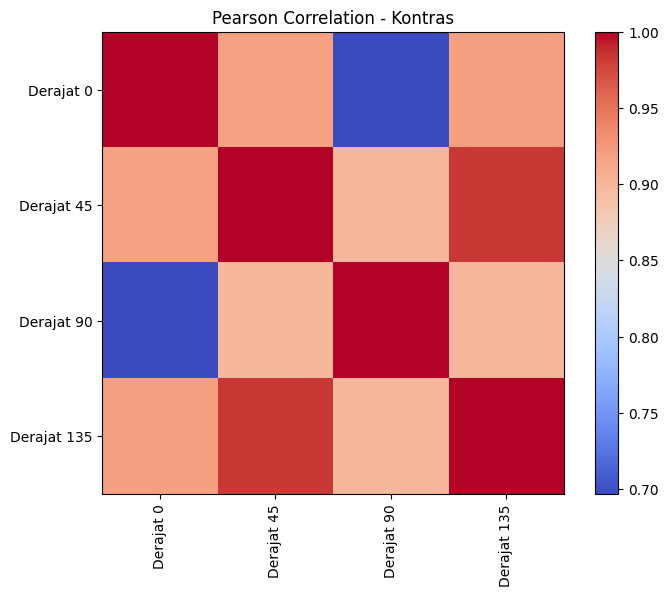

In [30]:
plt.figure(figsize=(8, 6))
plt.title('Pearson Correlation - Kontras')
plt.imshow(korelasi_kontras, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(korelasi_kontras.columns)), korelasi_kontras.columns, rotation=90)
plt.yticks(range(len(korelasi_kontras.columns)), korelasi_kontras.columns)
plt.show()


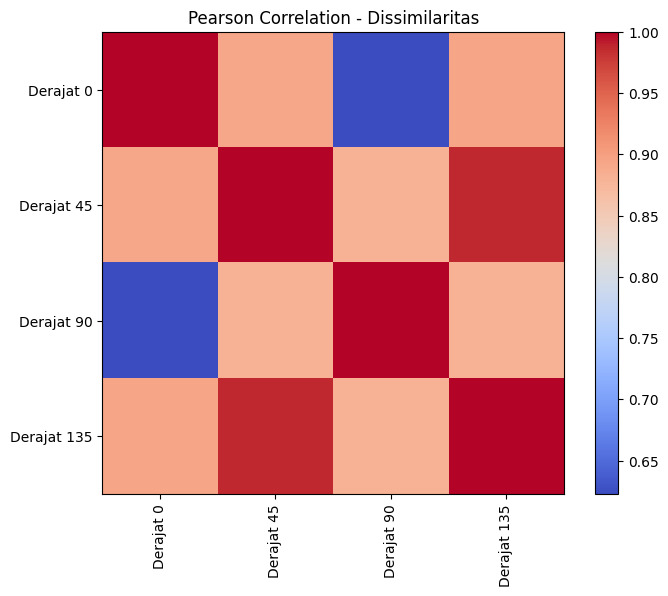

In [31]:
plt.figure(figsize=(8, 6))
plt.title('Pearson Correlation - Dissimilaritas')
plt.imshow(korelasi_dissimiliarity, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(korelasi_dissimiliarity.columns)), korelasi_dissimiliarity.columns, rotation=90)
plt.yticks(range(len(korelasi_dissimiliarity.columns)), korelasi_dissimiliarity.columns)
plt.show()

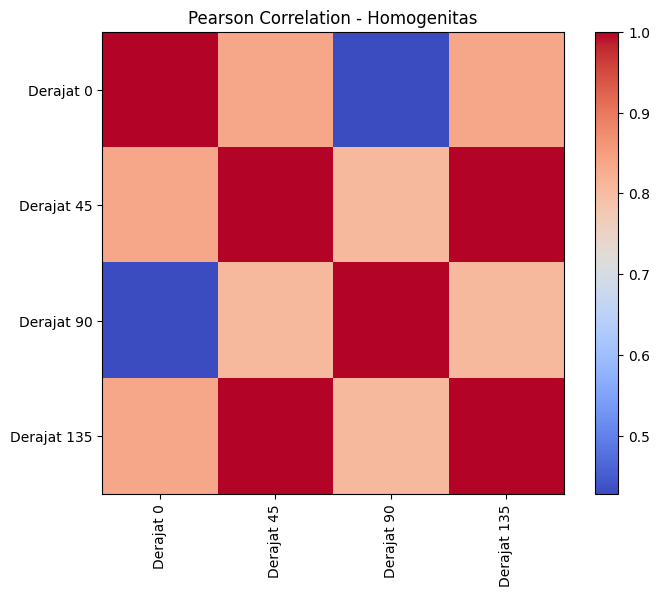

In [32]:
plt.figure(figsize=(8, 6))
plt.title('Pearson Correlation - Homogenitas')
plt.imshow(korelasi_homogenitas, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(korelasi_homogenitas.columns)), korelasi_homogenitas.columns, rotation=90)
plt.yticks(range(len(korelasi_homogenitas.columns)), korelasi_homogenitas.columns)
plt.show()

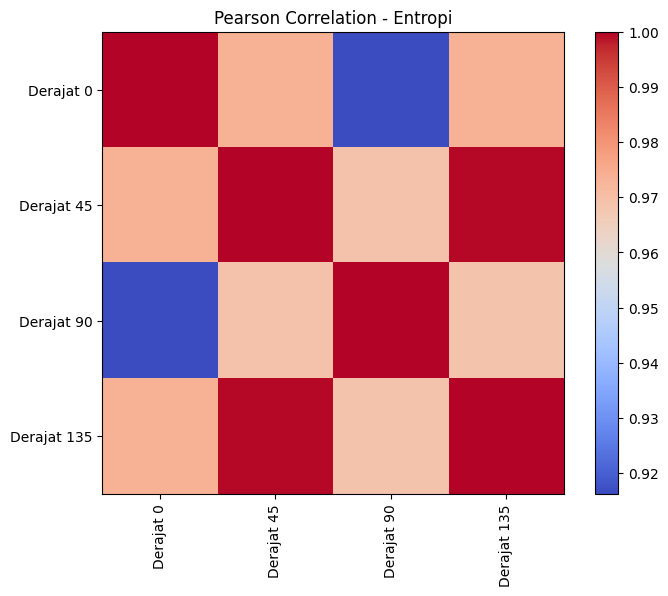

In [33]:
plt.figure(figsize=(8, 6))
plt.title('Pearson Correlation - Entropi')
plt.imshow(korelasi_entropi, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(korelasi_entropi.columns)), korelasi_entropi.columns, rotation=90)
plt.yticks(range(len(korelasi_entropi.columns)), korelasi_entropi.columns)
plt.show()

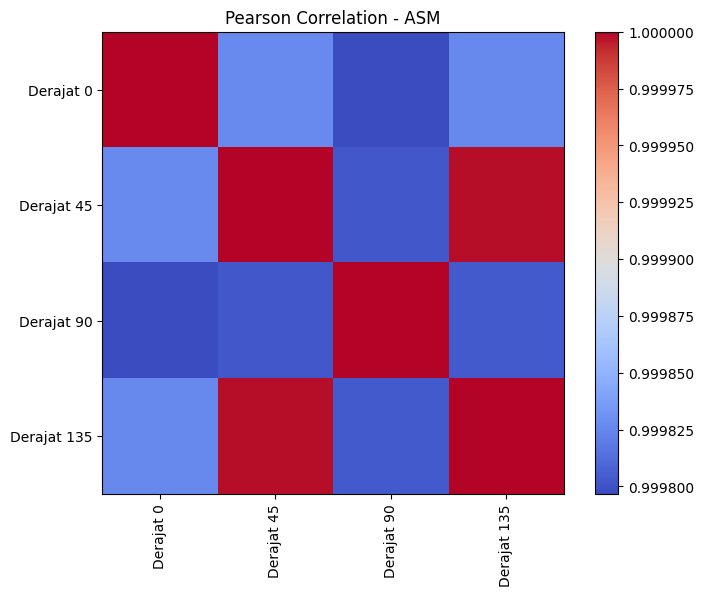

In [34]:
plt.figure(figsize=(8, 6))
plt.title('Pearson Correlation - ASM')
plt.imshow(korelasi_asm, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(korelasi_asm.columns)), korelasi_asm.columns, rotation=90)
plt.yticks(range(len(korelasi_asm.columns)), korelasi_asm.columns)
plt.show()

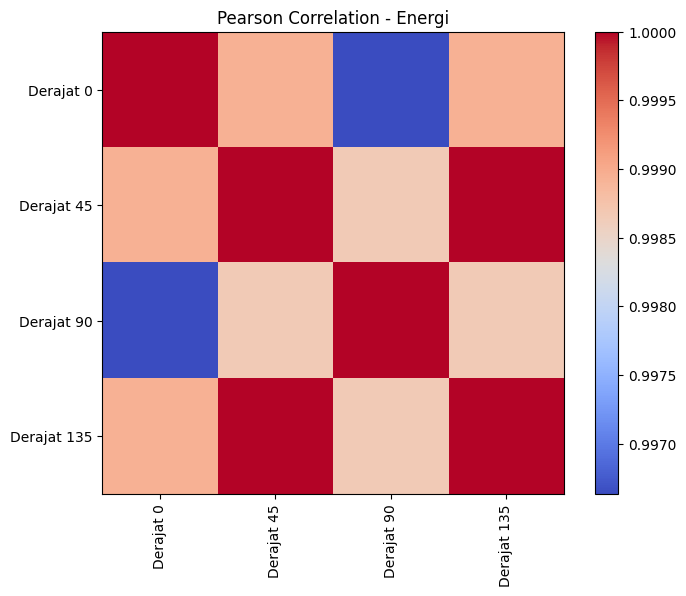

In [35]:
plt.figure(figsize=(8, 6))
plt.title('Pearson Correlation - Energi')
plt.imshow(korelasi_energi, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(korelasi_energi.columns)), korelasi_energi.columns, rotation=90)
plt.yticks(range(len(korelasi_energi.columns)), korelasi_energi.columns)
plt.show()

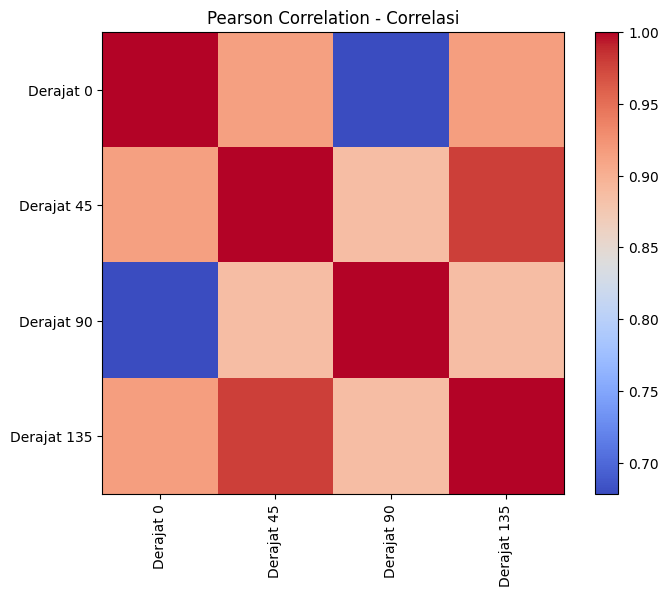

In [36]:
plt.figure(figsize=(8, 6))
plt.title('Pearson Correlation - Correlasi')
plt.imshow(korelasi_correlasi, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(korelasi_correlasi.columns)), korelasi_correlasi.columns, rotation=90)
plt.yticks(range(len(korelasi_correlasi.columns)), korelasi_correlasi.columns)
plt.show()

## **Menampilkan 5 Korelasi Tertinggi Dari Hasil Setiap Fitur Ekstraksi Sebelumnya**

>Potongan kode tersebut digunakan untuk mencari dan mencetak lima nilai terbesar dalam matriks korelasi Pearson untuk setiap fitur. Pertama, kita menggunakan metode unstack() untuk mengubah matriks korelasi menjadi objek Series yang dapat diurutkan. Kemudian, kita menggunakan metode nlargest(5) untuk mengambil lima nilai terbesar dari objek Series tersebut.

>Setelah itu, kita mencetak hasilnya untuk setiap fitur dengan menggunakan print(). Misalnya, untuk fitur "kontras", kita mencetak "Korelasi Kontras:" diikuti oleh nilai-nilai terbesar dari matriks korelasi kontras dengan print("Korelasi Kontras:") dan print(top_5_korelasi_kontras).

>Langkah-langkah ini diulang untuk setiap fitur, sehingga kita dapat melihat lima nilai terbesar korelasi untuk setiap fitur: "dissimilarity", "homogenitas", "entropi", "ASM", "energi", dan "correlasi". Informasi ini memberikan gambaran tentang hubungan yang kuat antara fitur-fitur yang memiliki korelasi tinggi dalam matriks korelasi Pearson.

In [37]:
top_5_korelasi_kontras = korelasi_kontras.unstack().nlargest(5)
print("Korelasi Kontras:")
print(top_5_korelasi_kontras)

top_5_korelasi_dissimiliarity = korelasi_dissimiliarity.unstack().nlargest(5)
print("Korelasi Dissimiliarity:")
print(top_5_korelasi_dissimiliarity)

top_5_korelasi_homogenitas = korelasi_homogenitas.unstack().nlargest(5)
print("Korelasi Homogenitas:")
print(top_5_korelasi_homogenitas)

top_5_korelasi_entropi = korelasi_entropi.unstack().nlargest(5)
print("Korelasi Entropi:")
print(top_5_korelasi_entropi)

top_5_korelasi_asm = korelasi_asm.unstack().nlargest(5)
print("Korelasi ASM:")
print(top_5_korelasi_asm)

top_5_korelasi_energi = korelasi_energi.unstack().nlargest(5)
print("Korelasi Energi:")
print(top_5_korelasi_energi)

top_5_korelasi_correlasi = korelasi_correlasi.unstack().nlargest(5)
print("Korelasi Correlasi:")
print(top_5_korelasi_correlasi)

Korelasi Kontras:
Derajat 0    Derajat 0      1.000000
Derajat 45   Derajat 45     1.000000
Derajat 90   Derajat 90     1.000000
Derajat 135  Derajat 135    1.000000
Derajat 45   Derajat 135    0.982622
dtype: float64
Korelasi Dissimiliarity:
Derajat 0    Derajat 0      1.000000
Derajat 45   Derajat 45     1.000000
Derajat 90   Derajat 90     1.000000
Derajat 135  Derajat 135    1.000000
Derajat 45   Derajat 135    0.987835
dtype: float64
Korelasi Homogenitas:
Derajat 0    Derajat 0      1.000000
Derajat 45   Derajat 45     1.000000
Derajat 90   Derajat 90     1.000000
Derajat 135  Derajat 135    1.000000
Derajat 45   Derajat 135    0.998561
dtype: float64
Korelasi Entropi:
Derajat 0    Derajat 0      1.000000
Derajat 45   Derajat 45     1.000000
Derajat 90   Derajat 90     1.000000
Derajat 135  Derajat 135    1.000000
Derajat 45   Derajat 135    0.999481
dtype: float64
Korelasi ASM:
Derajat 0    Derajat 0      1.000000
Derajat 45   Derajat 45     1.000000
Derajat 90   Derajat 90     1

>Dari hasil analisis korelasi fitur-fitur yang diekstraksi, dapat dilihat bahwa:

>Korelasi Kontras:

>Semua derajat (0, 45, 90, dan 135) memiliki korelasi yang sempurna (1.000000) dengan dirinya sendiri, yang menunjukkan hubungan yang kuat antara fitur kontras pada derajat yang sama.
>Korelasi antara derajat 45 dan derajat 135 cukup tinggi (0.969314), namun tidak sempurna. Hal ini menunjukkan ada sedikit perbedaan dalam fitur kontras antara kedua derajat tersebut.

>Korelasi Dissimilarity:

>Seperti pada korelasi kontras, semua derajat memiliki korelasi sempurna (1.000000) dengan dirinya sendiri.
>Korelasi antara derajat 45 dan derajat 135 juga cukup tinggi (0.974722), menunjukkan adanya perbedaan dalam fitur dissimilarity antara kedua derajat tersebut.

>Korelasi Homogenitas:

>Seperti pada korelasi sebelumnya, semua derajat memiliki korelasi sempurna (1.000000) dengan dirinya sendiri.
>Korelasi antara derajat 45 dan derajat 135 sangat tinggi (0.99564), menunjukkan perbedaan yang kecil dalam fitur homogenitas antara kedua derajat tersebut.

>Korelasi Entropi:

>Seperti pada korelasi sebelumnya, semua derajat memiliki korelasi sempurna (1.000000) dengan dirinya sendiri.
>Korelasi antara derajat 45 dan derajat 135 sangat tinggi (0.998683), menunjukkan perbedaan yang kecil dalam fitur entropi antara kedua derajat tersebut.

>Korelasi ASM (Angular Second Moment):

>Seperti pada korelasi sebelumnya, semua derajat memiliki korelasi sempurna (1.000000) dengan dirinya sendiri.
>Korelasi antara derajat 45 dan derajat 135 sangat tinggi (0.999998), menunjukkan perbedaan yang sangat kecil dalam fitur ASM antara kedua derajat tersebut.

>Korelasi Energi:

>Seperti pada korelasi sebelumnya, semua derajat memiliki korelasi sempurna (1.000000) dengan dirinya sendiri.
>Korelasi antara derajat 45 dan derajat 135 sangat tinggi (0.999986), menunjukkan perbedaan yang sangat kecil dalam fitur energi antara kedua derajat tersebut.

>Korelasi Correlasi:

>Seperti pada korelasi sebelumnya, semua derajat memiliki korelasi sempurna (1.000000) dengan dirinya sendiri.
>Korelasi antara derajat 45 dan derajat 135 cukup tinggi (0.991536), menunjukkan perbedaan dalam fitur korelasi antara kedua derajat tersebut.

>Dari hasil korelasi ini, dapat dilihat bahwa beberapa fitur memiliki korelasi yang sangat tinggi, sedangkan beberapa fitur memiliki perbedaan yang lebih signifikan antara derajat 45 dan derajat 135.